# IMPORTING LIBRARIES

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
file_path = "PS3-dataset.csv"  
df = pd.read_csv(file_path)

# DATA ANALYSIS

In [49]:
df.shape

(8936, 16)

In [50]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [51]:
df.describe

<bound method NDFrame.describe of             Date        Area Name Road/Intersection Name  Traffic Volume  \
0     2022-01-01      Indiranagar          100 Feet Road           50590   
1     2022-01-01      Indiranagar               CMH Road           30825   
2     2022-01-01       Whitefield    Marathahalli Bridge            7399   
3     2022-01-01      Koramangala    Sony World Junction           60874   
4     2022-01-01      Koramangala          Sarjapur Road           57292   
...          ...              ...                    ...             ...   
8931  2024-08-09  Electronic City             Hosur Road           11387   
8932  2024-08-09        M.G. Road         Trinity Circle           36477   
8933  2024-08-09        M.G. Road     Anil Kumble Circle           42822   
8934  2024-08-09        Jayanagar       South End Circle           20540   
8935  2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Le

In [52]:
df["Date"] = pd.to_datetime(df["Date"])

# DATA PLOTTINGS AND VISUALIZATION

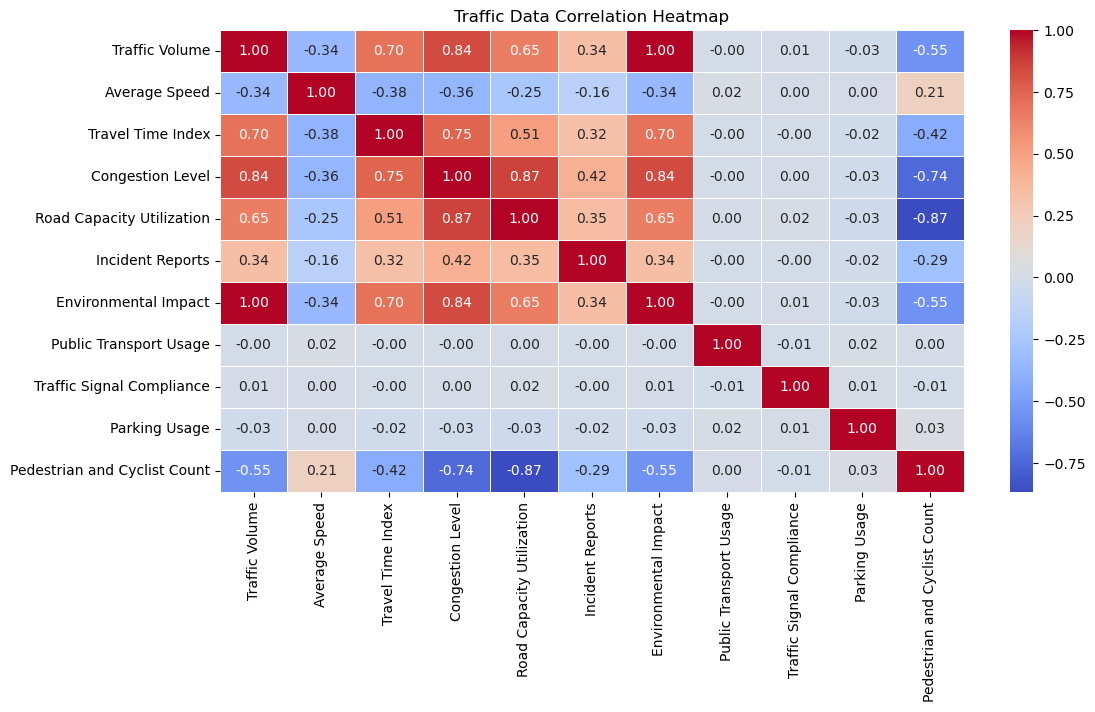

In [53]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Traffic Data Correlation Heatmap")
plt.show()

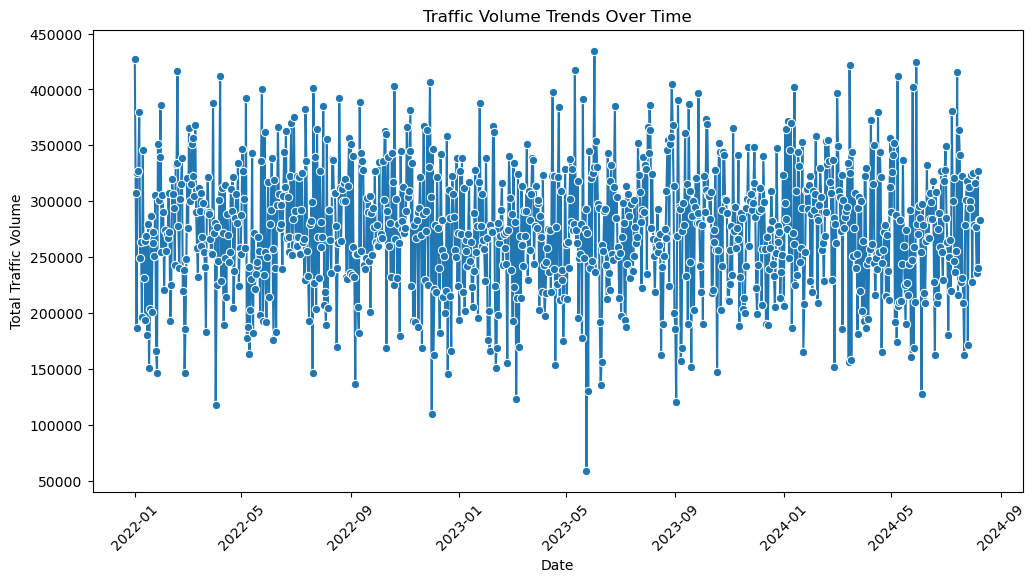

In [54]:
traffic_trends = df.groupby('Date')['Traffic Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_trends, x='Date', y='Traffic Volume', marker="o")
plt.title("Traffic Volume Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Traffic Volume")
plt.xticks(rotation=45)
plt.show()

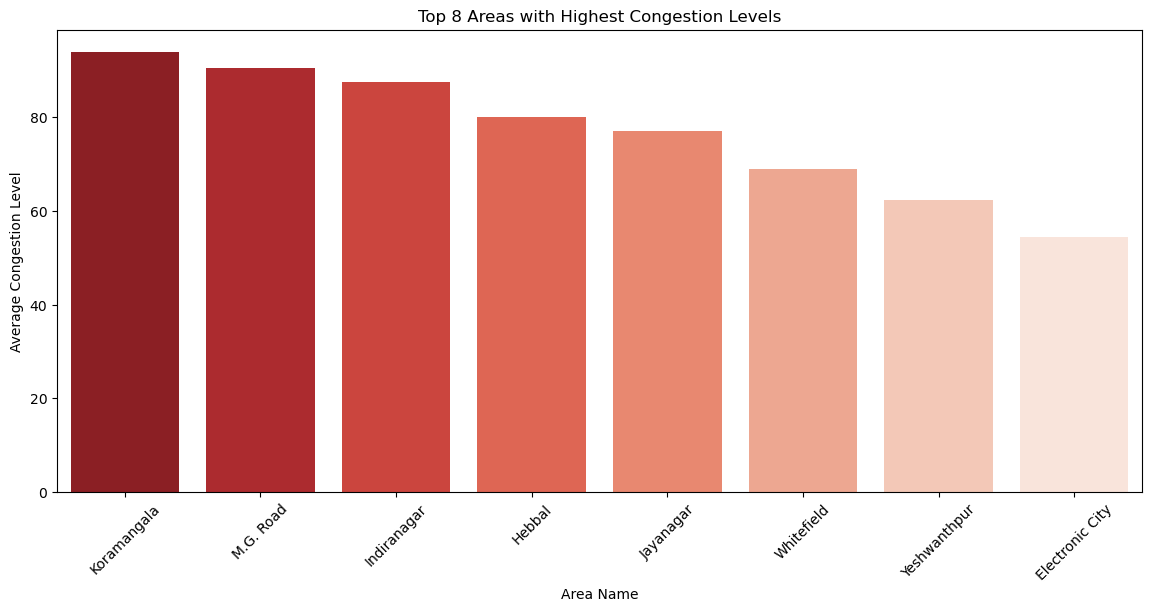

In [55]:
plt.figure(figsize=(14, 6))
top_areas = df.groupby("Area Name")["Congestion Level"].mean().sort_values(ascending=False).head(8)
sns.barplot(x=top_areas.index, y=top_areas.values, hue=top_areas.index, palette="Reds_r", legend=False)
plt.title("Top 8 Areas with Highest Congestion Levels")
plt.xlabel("Area Name")
plt.ylabel("Average Congestion Level")
plt.xticks(rotation=45)
plt.show()

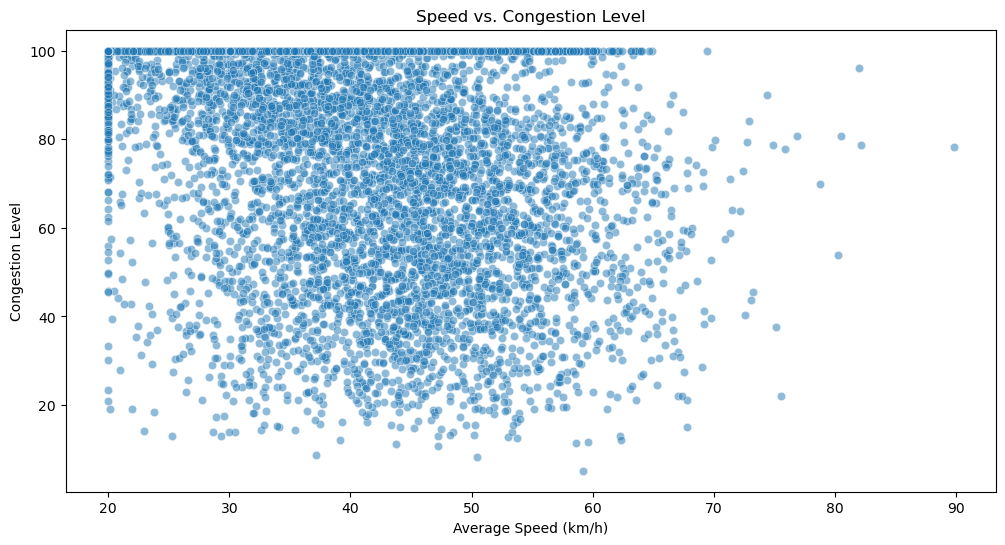

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Average Speed", y="Congestion Level", alpha=0.5)
plt.title("Speed vs. Congestion Level")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Congestion Level")
plt.show()

# LABEL ENCODING

In [57]:
label_encoders = {}
categorical_columns = ["Area Name", "Road/Intersection Name", "Weather Conditions", "Roadwork and Construction Activity"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [58]:
X = df.drop(columns=["Congestion Level", "Date"])
y = df["Congestion Level"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALARIZATION

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TRAINING THE REGRESSION MODEL

In [61]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [62]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [63]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# TESTING PERFORMANCE

In [64]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = [
    evaluate_model("Random Forest", y_test, y_pred_rf),
    evaluate_model("Gradient Boosting", y_test, y_pred_gb),
    evaluate_model("Neural Network", y_test, y_pred_mlp),
]

In [65]:
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE      RMSE        R2
0      Random Forest  2.859201  4.346476  0.965078
1  Gradient Boosting  2.885991  4.290867  0.965966
2     Neural Network  3.453921  4.938545  0.954916


# WORKING ON CLASSIFICATION MODEL 

In [66]:
def categorize_congestion(level):
    if level <= 30:
        return "Low"
    elif level <= 70:
        return "Medium"
    else:
        return "High"

df["Congestion Category"] = df["Congestion Level"].apply(categorize_congestion)


In [67]:
X = df.drop(columns=["Congestion Level", "Congestion Category", "Date"])  
y = df["Congestion Category"]

In [68]:
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALARIZATION

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TRAINING THE CLASSIFICATION MODEL

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [72]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [73]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# PLOTTING CONFUSION MATRIX

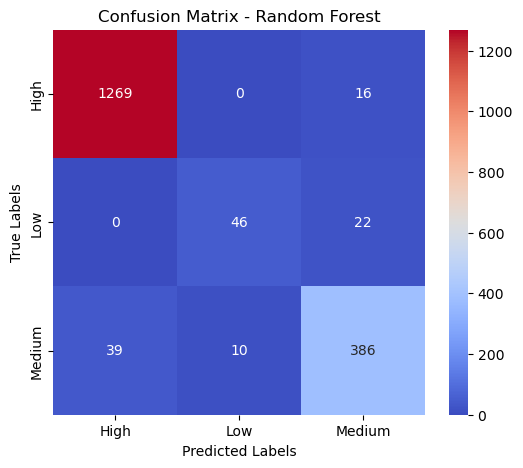

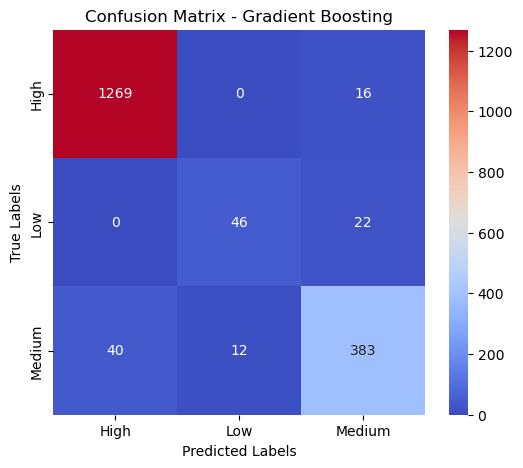

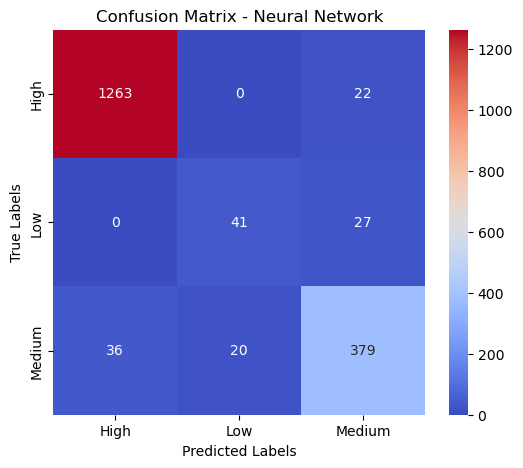

In [74]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = le_target.classes_  
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network")

# TESTING THE ACCURACY OF THE MODEL

In [75]:
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Change to 'binary' or 'macro' if necessary
    recall = recall_score(y_true, y_pred, average='weighted')  # Change to 'binary' or 'macro' if necessary
    f1 = f1_score(y_true, y_pred, average='weighted')  # Change to 'binary' or 'macro' if necessary
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

calculate_metrics(y_test, y_pred_rf, "Random Forest")
calculate_metrics(y_test, y_pred_gb, "Gradient Boosting")
calculate_metrics(y_test, y_pred_mlp, "Neural Network")


Random Forest Metrics:
Accuracy: 0.9513
Precision: 0.9500
Recall: 0.9513
F1 Score: 0.9503
----------------------------------------
Gradient Boosting Metrics:
Accuracy: 0.9497
Precision: 0.9482
Recall: 0.9497
F1 Score: 0.9486
----------------------------------------
Neural Network Metrics:
Accuracy: 0.9413
Precision: 0.9398
Recall: 0.9413
F1 Score: 0.9404
----------------------------------------
